# electricity mix for US

- carculator elec mix documentation: https://carculator.readthedocs.io/en/latest/modeling.html#electricity-mix-calculation

- elec mix data for 92 countries (row sum != 100%, for U.S. 2000 has row sum of 157%: https://github.com/romainsacchi/carculator_utils/blob/master/carculator_utils/data/electricity/electricity_mixes.csv

In [1]:
import pandas as pd
import numpy as np
#from carculator import *
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
# path
drive.mount('/content/gdrive')
gdrive_path = '/content/gdrive/My Drive/02.22_FRQ_Mobilité_durable_IVEO/Project/Lit_review_resources/tools/carculator/trial_code/benchmark/fuel_pathway'

Mounted at /content/gdrive


In [3]:
carc_url = "https://raw.githubusercontent.com/romainsacchi/carculator_utils/master/carculator_utils/data/electricity/electricity_mixes.csv"
carc_df = pd.read_csv(carc_url, sep = ";")
carc_us = carc_df[carc_df["country"] == "US"]
carc_us.head()

country  year  Hydro  Nuclear   Gas  Solar  Wind  Biomass  Coal   Oil  \
706      US  2000   0.07     0.20  0.16   0.00  0.00     0.01  0.53  0.03   
707      US  2005   0.07     0.19  0.18   0.00  0.00     0.01  0.50  0.03   
708      US  2015   0.06     0.20  0.34   0.01  0.06     0.01  0.30  0.01   
709      US  2016   0.06     0.20  0.34   0.01  0.06     0.01  0.30  0.01   
710      US  2020   0.06     0.20  0.06   0.02  0.07     0.01  0.14  0.00   

     ...  Biomass CCS  Coal CCS  Gas CCS  Wood CCS  Hydro, reservoir  \
706  ...          0.0       0.0      0.0       0.0              0.00   
707  ...          0.0       0.0      0.0       0.0              0.00   
708  ...          0.0       0.0      0.0       0.0              0.00   
709  ...          0.0       0.0      0.0       0.0              0.05   
710  ...          0.0       0.0      0.0       0.0              0.02   

     Gas CCGT  Gas CHP  Solar, thermal  Wind, offshore  Lignite  
706      0.00     0.02             0.0            0.54     0.00  
707      0.00     0.07             0.0            0.03     0.00  
708      0.11     0.06             0.0            0.28     0.00  
709      0.07     0.00             0.0            0.02     0.02  
710      0.04     0.27             0.0            0.00     0.10  

[5 rows x 23 columns]

In [4]:
len(np.unique(carc_df["country"].values) )

92

In [ ]:
carc_us.columns

Index(['country', 'year', 'Hydro', 'Nuclear', 'Gas', 'Solar', 'Wind',
       'Biomass', 'Coal', 'Oil', 'Geothermal', 'Waste', 'Biogas CCS',
       'Biomass CCS', 'Coal CCS', 'Gas CCS', 'Wood CCS', 'Hydro, reservoir',
       'Gas CCGT', 'Gas CHP', 'Solar, thermal', 'Wind, offshore', 'Lignite'],
      dtype='object')

In [ ]:
carc_us.iloc[:,2:].sum(axis=1)

706    1.57
707    1.09
708    1.45
709    1.16
710    0.99
711    1.00
712    1.00
713    1.01
dtype: float64

In [ ]:
carc_us.iloc[:,2:12].sum(axis=1) #selected cols: hydro to waste

706    1.01
707    0.99
708    1.00
709    1.00
710    0.56
711    1.00
712    1.00
713    1.01
dtype: float64

In [ ]:
# only see 2020 elec. mix data for all countries
carc_2020 = carc_df[carc_df['year'] == 2020]
carc_2020["all_sum"] = carc_2020.iloc[:,2:].sum(axis=1)
carc_2020.loc[: , ['country','all_sum']]

<ipython-input-9-829de36580fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carc_2020["all_sum"] = carc_2020.iloc[:,2:].sum(axis=1)


country  all_sum
2        AO    1.000
12       AT    1.010
19       AU    1.000
25       BA    0.287
34       BD    1.000
..      ...      ...
701      UG    1.475
710      US    0.990
716      ZA    1.361
723      ZM    1.089
730      ZW    1.530

[92 rows x 2 columns]

### electricity mix for coal, gas, nuclear
- biomass 0 - 1% not plotted

In [ ]:
df = pd.read_excel(f'{gdrive_path}/elec_mix_whGHGenius_AFLEET2023.xlsx', header = [0,1], index_col = 0 )  # new version with both AFLEET 2020 and 2023, old version is elec_mix_whGHGenius
df

year Natural Gas                                             Coal             \
           GREET AFLEET2020 AFLEET2023 Carculator GHGenius  GREET AFLEET2020   
2000       0.158      0.158      0.158       0.16   0.1667  0.517      0.517   
2005       0.157      0.157      0.157       0.18   0.2033  0.517      0.517   
2015       0.316      0.316      0.316       0.34   0.3267  0.342      0.342   
2020       0.396      0.368      0.396       0.06   0.3900  0.200      0.228   
2025       0.347      0.364      0.347       0.16   0.3733  0.177      0.177   
2030       0.335      0.344      0.335       0.04   0.3767  0.161      0.181   
2040       0.330      0.364      0.330       0.04   0.3900  0.123      0.159   

year                                 ... Hydroelectric          Geothermal  \
     AFLEET2023 Carculator GHGenius  ...    Carculator GHGenius      GREET   
2000      0.517       0.53   0.4667  ...          0.07   0.1133       0.00   
2005      0.517       0.50   0.4500  ...          0.07   0.1033       0.00   
2015      0.342       0.30   0.3000  ...          0.06   0.0833       0.00   
2020      0.200       0.14   0.1700  ...          0.06   0.0967       0.00   
2025      0.177       0.08   0.1633  ...          0.02   0.1267       0.00   
2030      0.161       0.03   0.1633  ...          0.04   0.1267       0.01   
2040      0.123       0.01   0.1300  ...          0.03   0.1133       0.01   

year             Wind                     Solar PV                      
     Carculator GREET Carculator GHGenius    GREET Carculator GHGenius  
2000       0.00  0.00       0.00   0.0033     0.00       0.00   0.0000  
2005       0.00  0.00       0.00   0.0067     0.00       0.00   0.0000  
2015       0.00  0.05       0.06   0.0467     0.01       0.01   0.0100  
2020       0.00  0.09       0.07   0.0733     0.02       0.02   0.0300  
2025       0.10  0.12       0.29   0.0900     0.08       0.05   0.0433  
2030       0.11  0.13       0.49   0.0867     0.11       0.06   0.0667  
2040       0.09  0.13       0.57   0.0867     0.16       0.07   0.0967  

[7 rows x 31 columns]

<ipython-input-19-3e40cb59bad4>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.0%}'.format(x) for x in ax1.get_yticks()])
<ipython-input-19-3e40cb59bad4>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0%}'.format(x) for x in ax2.get_yticks()])
<ipython-input-19-3e40cb59bad4>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(['{:,.0%}'.format(x) for x in ax3.get_yticks()])


[Text(0, 0.0, '0%'),
 Text(0, 0.05, '5%'),
 Text(0, 0.1, '10%'),
 Text(0, 0.15000000000000002, '15%'),
 Text(0, 0.2, '20%'),
 Text(0, 0.25, '25%')]

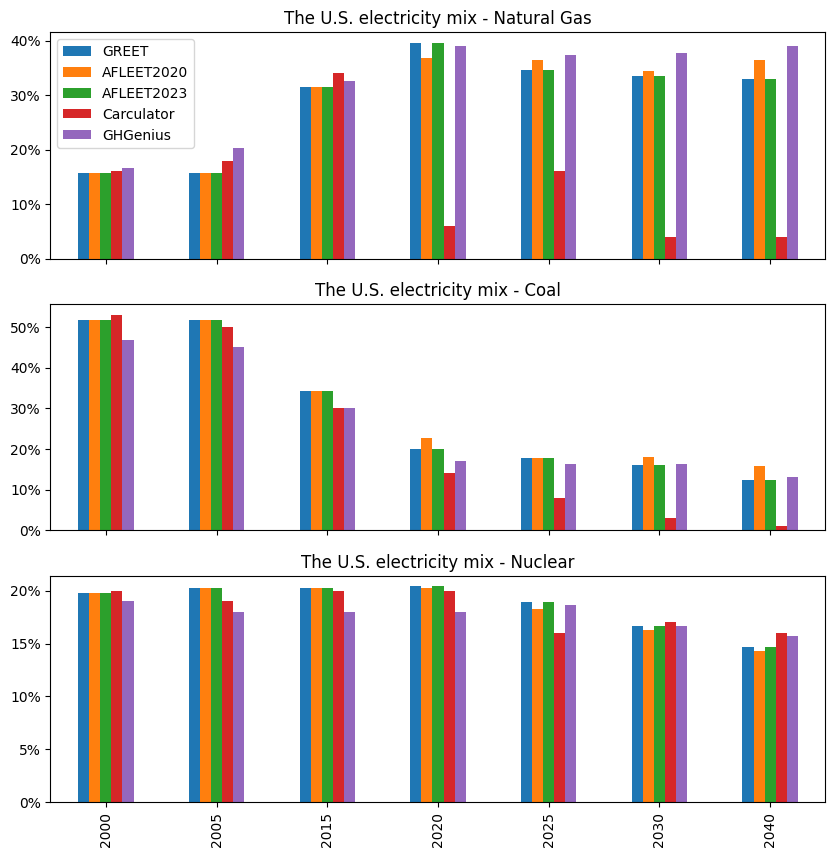

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex = True)

df["Natural Gas"].plot.bar(ax=ax1, figsize = (10,10), title = "The U.S. electricity mix - Natural Gas")
ax1.set_yticklabels(['{:,.0%}'.format(x) for x in ax1.get_yticks()])
ax1.legend(alignment = "left")
df["Coal"].plot.bar(ax=ax2, legend = False, title = "The U.S. electricity mix - Coal")
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in ax2.get_yticks()])
df["Nuclear"].plot.bar(ax=ax3, legend = False, title = "The U.S. electricity mix - Nuclear")
ax3.set_yticklabels(['{:,.0%}'.format(x) for x in ax3.get_yticks()])


### electricity mix for renewable (commonly listed in GREET & carculator: hydro, geothermal, solor PV, wind)
- AFLEET does not have break-down on "others" category thus not plotted

<ipython-input-22-155448da31b1>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.0%}'.format(x) for x in ax1.get_yticks()])
<ipython-input-22-155448da31b1>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0%}'.format(x) for x in ax2.get_yticks()])
<ipython-input-22-155448da31b1>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(['{:,.0%}'.format(x) for x in ax3.get_yticks()])
<ipython-input-22-155448da31b1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels(['{:,.0%}'.format(x) for x in ax4.get_yticks()])


[Text(0, 0.0, '0%'),
 Text(0, 0.02, '2%'),
 Text(0, 0.04, '4%'),
 Text(0, 0.06, '6%'),
 Text(0, 0.08, '8%'),
 Text(0, 0.1, '10%'),
 Text(0, 0.12, '12%'),
 Text(0, 0.14, '14%'),
 Text(0, 0.16, '16%'),
 Text(0, 0.18, '18%')]

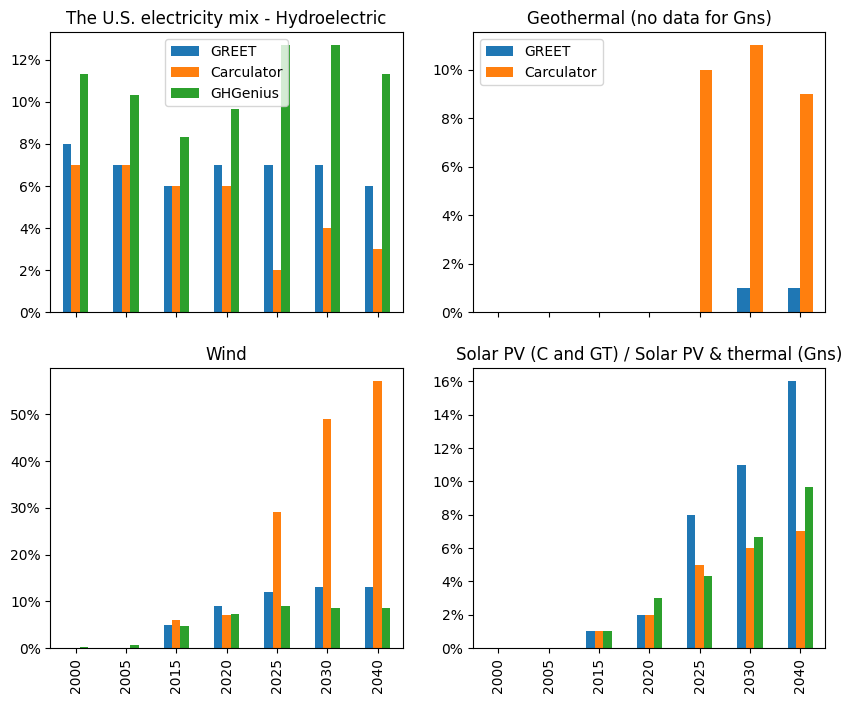

In [ ]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, sharex = True)

df["Hydroelectric"].plot.bar(ax=ax1, legend = True,  figsize = (10, 8), title = "The U.S. electricity mix - Hydroelectric")
ax1.set_yticklabels(['{:,.0%}'.format(x) for x in ax1.get_yticks()])
df["Geothermal"].plot.bar(ax=ax2, title = "Geothermal (no data for Gns)")
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in ax2.get_yticks()])
df["Wind"].plot.bar(ax=ax3, legend = False, title = "Wind")
ax3.set_yticklabels(['{:,.0%}'.format(x) for x in ax3.get_yticks()])
df["Solar PV"].plot.bar(ax=ax4, legend = False, title = "Solar PV (C and GT) / Solar PV & thermal (Gns)")
ax4.set_yticklabels(['{:,.0%}'.format(x) for x in ax4.get_yticks()])
#plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])